# Исследование перспективных компьютерных игр интернет-магазина «Стримчик»

## Краткое описание проекта 
Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности для формирования приоритета потенциально популярных продуктов для более успешной рекламной кампании.

### Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Обзор данных

Считаем файл, выведем часть строк на экран для знакомства с базой данных:

### Импорт библиотек и базы данных

In [43]:
import pandas as pd                         # Импортируем библиотеки
import seaborn as sns                                           
import math
import matplotlib.pyplot as plt                                
from scipy import stats as st
import numpy as np

In [44]:
pd.read_csv('https://code.s3.yandex.net/datasets/games.csv',nrows = 5).head()    # Выведем на экран первые 5 строк   

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Проверив файл, приходим к выводу, что файл корректно считывается, коррекция разделителя столбцов не требуется. Считаем файлы полностью:


In [45]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')                           # Считаем файлы
df.head(10)                                                       # Выведем на экран первые строки

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Выявление аномалий и дубликатов

In [46]:
display(df.info())                          # Выведем на экран общую информацию

print('    Пропусков по столбцам:')
display(df.isna().sum())                     # подсчёт пропусков

print('    Вывод статистической информации:')
round(df.describe(),2)                       # Выведем на экран статистическую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

    Пропусков по столбцам:


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

    Вывод статистической информации:


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


Промежуточный вывод: названия столбцов не соответствуют змеиному регистру, столбец 'User_Score' имеет текстовый тип, аномалий по статистической информации не прослеживается. Можно удалить строки с пропусками в столбцах 'name' и 'genre'.

In [47]:
print('Явных дубликатов: ',df.duplicated().sum())         # Вывод количества явных дубликатов
columns = ['Platform','Year_of_Release','Genre','Rating'] # Создаем список проверяемых столбцов с данными:
for i in columns:                 # Создаем цикл, который пройдет по всем значениям списка columns
                 # И при помощи метода .value_counts() возвращаем перечень уникальных значений и их кол-во
    display(df[i].value_counts()) 

Явных дубликатов:  0


PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

Промежуточный вывод: значимых аномалий, явных и неявных дубликатов не обнаружено.

По данным информации, отображенной на экране в предыдущей ячейке, можно сделать план предобработки данных:

### План предобработки: 
<a class="anchor" id="plan"></a>
* привести названия столбцов к нижнему регистру;
* столбцу 'User_Score' изменить тип на 'float';
* удалить строки с пропусками в столбцах 'name' и 'genre';
* пропуски в столбцах, 'Year_of_Release', 'User_Score', 'Critic_Score' и 'Rating' оставить как есть, потому что замена на нули будет вводить в заблуждение, а определить верную информацию по другим ячейкам не представляется возможным.
* добавить столбец с суммарными продажами по всем странам;

## Предобработка

### Переименование столбцов
Изменим названия столбцов (в соответствие со змеиным регистром):

In [48]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Промежуточный вывод: переименование завершено успешно.

### Изменение типа
В процессе замены типа данных в столбце 'user_score' высвечивалась ошибка, означающая невозможность перевода значений этого столбца 'tbd' (вероятно, удаленные значения) в числовой тип. В связи с этим возникла необходимость замены значений 'tbd' на пропуски:

In [49]:
display(df[df['user_score']=='tbd'])                          #Посмотрим на объем проблемы
df['user_score'].replace('tbd',np.nan,inplace=True)           #заменим 'tbd' на Nan
df['user_score'] = df['user_score'].astype('float32')           #изменим тип на числовой
print('Тип user_score:',df['user_score'].dtypes)              #выведем тип на экран

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Тип user_score: float32


Промежуточный вывод: изменение типа на числовой завершено успешно.

### Удаление строк с пропусками в важных столбцах

Строки с пропусками в столбцах 'name' и 'genre' следует удалить (их всего было 2 строчки), поскольку эти строки являются ключевыми, данные с пропусками в этих строках могут быть ошибочными.

In [50]:
print(len(df))                                                  # выведем кол-во строк до удаления
df = df.dropna(subset=['name','genre']).reset_index(drop=True)  # удалим строки с пропусками в указанных столбцах
print(len(df))                                                  # выведем кол-во строк после удаления

16715
16713


Промежуточный вывод: удаление двух строк с пропусками завершено успешно.
    
Подитоживая данный подраздел, выполним задание по пояснению принятых решений в отношении пропусков:
* строки с пропусками в столбцах 'name' и 'genre' были удалены, поскольку эти строки являются ключевыми, данные с пропусками в этих строках могут быть ошибочными (но их всего было 2 строчки);
* строки с пропусками одновременно в столбцах 'critic_score' и 'user_score' были удалены в связи с тем, что задача исследования - найти определяющие успешность игры закомерности и, пожалуй, единственным критерием успешности является показатель оценки критиков и пользователей. Наличие же пропусков одновременно в двух этих ячейках приведет к искажению результатов анализа. Причиной пропусков в данном случае, является, вероятно, отсутствие ведения статистики оценок компьютерных игр, это приемущественно старые игры;
* пропуски в столбцах 'Year_of_Release' и 'Rating' не должны исказить результаты исследования, поэтому они оставлены как есть.
* на пропуски были заменены в столбце 'user_score' текстовые значения 'tbd' (вероятно, удаленные значения) для перевода столбца в числовой тип.
   

### Добавление столбца с суммарной продажей (млн шт)
Добавим дополнительный столбец к обрезанному и полному датафреймам: 

In [51]:
df['all_sales'] = df['na_sales'] +df['eu_sales']+df['jp_sales']+df['other_sales']
#df_all['all_sales'] = df_all['na_sales'] +df_all['eu_sales']+df_all['jp_sales']+df_all['other_sales']
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Промежуточный вывод: добавление столбца завершено успешно.

### Знакомство с данными

Построим гистограммы продаж и оценки критиков:

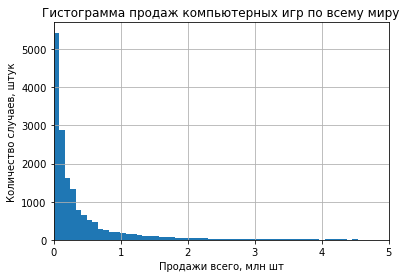

In [52]:
df['all_sales'].plot(kind='hist',title='Гистограмма продаж компьютерных игр по всему миру',bins=1000,xlim=(0,5),grid=True)
plt.xlabel("Продажи всего, млн шт")
plt.ylabel("Количество случаев, штук")  
plt.show()

Промежуточный вывод: гистограмма продаж построена.

Обращает внимание то, что несмотря на начало датафрейма с продажами игр в размере 20-30 млн, таких игр на самом деле очень-очень мало. Большинство игр имеет продажи до 0,5 млн человек.

Более точную динамику можно оценить при помощи метода вывода статистической информации describe():
большинство игр имеют продажи (между 1 и 3 квартилем) в количестве 0,09 млн шт до 0,63 млн шт, медиана 0,24 млн шт, среднее арифметическое 0,67 млн. Хотя при этом максимум составляет 82,54 млн, то есть большие продажи есть, но продажи в размере 20 и более миллионов относятся к оцень малому количеству игр.

In [53]:
df['all_sales'].describe()

count    16713.000000
mean         0.533315
std          1.548282
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: all_sales, dtype: float64

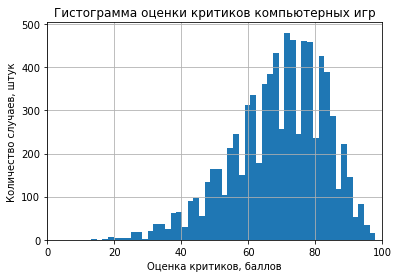

In [54]:
df['critic_score'].plot(kind='hist',title='Гистограмма оценки критиков компьютерных игр',bins=50,xlim=(0,100),grid=True)
plt.xlabel("Оценка критиков, баллов")
plt.ylabel("Количество случаев, штук")  
plt.show()

Промежуточный вывод: гистограмма оценок критиков построена.
Распределение нормальное.
Однако, надо отметить тот факт, что низкие оценки критиков ниже 40 баллов встречаются очень редко, что означает, что есть большая часть игр имеющие очень низкие продажи, но при этом довольно большие оценки критиков.
Попробуем построить точечную диаграмму, где будет видна взаимосвязь оценки критиков и продажи игр. 

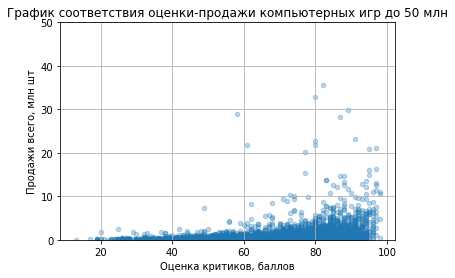

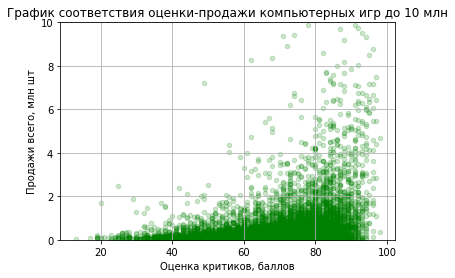

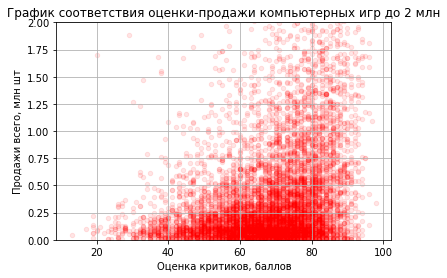

In [55]:
df.plot(x='critic_score',y='all_sales',kind='scatter',title='График соответствия оценки-продажи компьютерных игр до 50 млн',
    ylim=(0,50),grid=True,alpha=0.3)
plt.xlabel("Оценка критиков, баллов")
plt.ylabel("Продажи всего, млн шт")  
plt.show()

df.plot(x='critic_score',y='all_sales',kind='scatter',title='График соответствия оценки-продажи компьютерных игр до 10 млн',
    ylim=(0,10),grid=True,alpha=0.2,color='g')
plt.xlabel("Оценка критиков, баллов")
plt.ylabel("Продажи всего, млн шт")  
plt.show()

df.plot(x='critic_score',y='all_sales',kind='scatter',title='График соответствия оценки-продажи компьютерных игр до 2 млн',
    ylim=(0,2),grid=True,alpha=0.1,color='r')
plt.xlabel("Оценка критиков, баллов")
plt.ylabel("Продажи всего, млн шт")  
plt.show()

Промежуточный вывод: успешность продаж компьютерных игр с оценкой критиков :
* менее 20 баллов стремится к нулю;
* от 20 до 40 баллов очень низкая;
* от 40 до 60 баллов низкая;
* от 60 до 80 баллов средняя;
* от 80 баллов и выше высокая.

## Анализ

### Количество игр по годам
Сформируем сводную таблицу с выпуском количества игр по годам и суммарного количества продаж:

,count_game,all_sales
year_of_release,,
1980.0,9,11.38
1981.0,46,35.68
1982.0,36,28.88
1983.0,17,16.80
1984.0,14,50.35
1985.0,14,53.95
1986.0,21,37.08
1987.0,16,21.70
1988.0,15,47.21


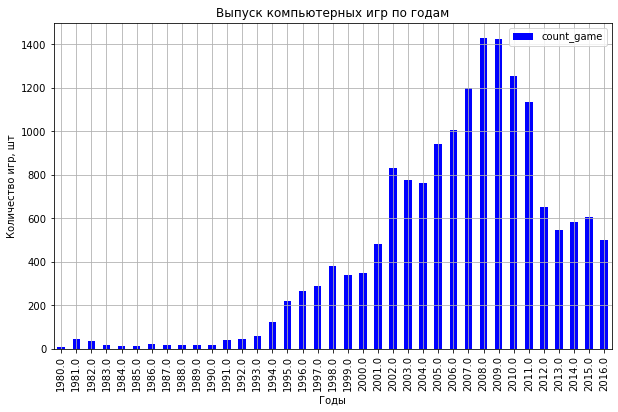

In [56]:
#display(df_all.head(5))
pivot_year = df.pivot_table(index='year_of_release',    # Создаём сводную таблицу 
    values='all_sales',aggfunc=['count','sum'])
pivot_year.columns = ['count_game','all_sales']             # переименовываем столбцы
display(pivot_year)

pivot_year.reset_index().plot(x='year_of_release',y='count_game',kind='bar',title='Выпуск компьютерных игр по годам',
    ylim=(0,1500),grid=True,color='b',figsize=(10,6))
plt.xlabel("Годы")
plt.ylabel("Количество игр, шт")  
plt.show()

Максимальное количество игр - 1427 штук было выпущено в 2008 году, к 2016 году их количество снизилось до 502.

Кроме ожидаемого роста количества игр в 90-е годы, наблюдается падение выпуска игр после 2009 года (вероятно, из-за роста доли игр для мобильных приложений).

### Жизненные циклы платформ
Сформируем сводную таблицу количества продаж игр с дифференциацией по платформам и годам:

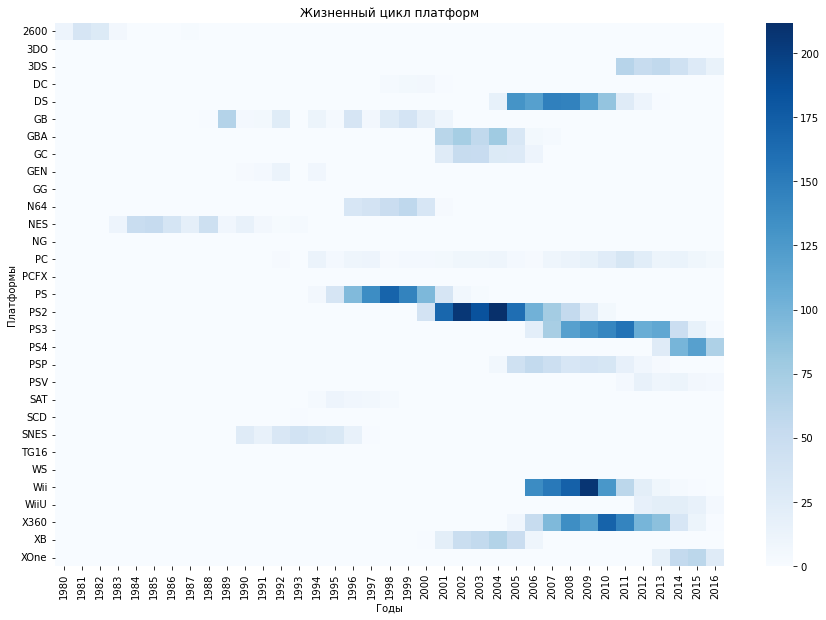

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,all_year
platform,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PS2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39.17,166.43,205.38,184.31,211.81,160.66,103.42,75.99,53.90,26.40,5.64,0.45,0.00,0.00,0.00,0.00,0.00,1233.56
X360,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.25,51.62,95.41,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52,961.24
PS3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.96,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60,931.34
Wii,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,137.15,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18,891.18
DS,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,0.00,0.00,0.00,802.78
PS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.03,35.96,94.70,136.17,169.49,144.53,96.37,35.59,6.67,2.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,727.58
PS4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25.99,100.00,118.90,69.25,314.14
GBA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,61.53,74.16,56.67,77.91,33.86,5.28,3.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,312.88
PSP,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.06,43.84,55.32,46.93,34.55,37.78,35.04,17.82,7.69,3.14,0.24,0.12,0.00,289.53


In [57]:
#display(df_all.head())
pivot_platform = df.pivot_table(index='platform', columns='year_of_release',    # Создаём сводную таблицу 
    values='all_sales',aggfunc=['sum'])
pivot_platform = pivot_platform.fillna(0)                                           # заменяем пропуски на нули
pivot_platform.columns = ['1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990',
    '1991','1992','1993','1994','1995','1996','1997','1998','1999','2000',
    '2001','2002','2003','2004','2005','2006','2007','2008','2009','2010',          # Изменяем названия столбцов
    '2011','2012','2013','2014','2015','2016']

plt.figure(figsize=(15,10))
sns.heatmap(pivot_platform, cmap="Blues")
plt.xlabel("Годы")
plt.ylabel("Платформы")
plt.title('Жизненный цикл платформ')
plt.show()

pivot_platform['all_year'] = (pivot_platform['1980']+pivot_platform['1981']+pivot_platform['1982']
    +pivot_platform['1983']+pivot_platform['1984']+pivot_platform['1985']+pivot_platform['1986']
    +pivot_platform['1987']+pivot_platform['1988']+pivot_platform['1989']+pivot_platform['1990']
    +pivot_platform['1991']+pivot_platform['1992']+pivot_platform['1993']+pivot_platform['1994']
    +pivot_platform['1995']+pivot_platform['1996']+pivot_platform['1997']+pivot_platform['1998']
    +pivot_platform['1999']+pivot_platform['2000']+pivot_platform['2001']+pivot_platform['2002']
    +pivot_platform['2003']+pivot_platform['2004']+pivot_platform['2005']+pivot_platform['2006']
    +pivot_platform['2007']+pivot_platform['2008']+pivot_platform['2009']+pivot_platform['2010']
    +pivot_platform['2011']+pivot_platform['2012']+pivot_platform['2013']+pivot_platform['2014']
    +pivot_platform['2015']+pivot_platform['2016'])                                # Суммируем
pivot_platform = pivot_platform.sort_values(by='all_year',ascending = False)       # Сортируем по уменьшению продаж
pd.set_option('display.max_columns', 50)                                           # Расширяем кругозор
display(pivot_platform.head(20))                                                   # Вывод на экран Топ-10


Промежуточный вывод: соответствующая сводная таблица с распределением по годам построена.
Судя по таблице, для всех платформ, кроме персональных компьютеров, характерен срок жизни от 7 до 11-12 лет.

### Фильтрация по последнему году
Отфильтруем датафрейм по актуальному, то есть последнему, 2016 году:

In [58]:
#display(df_all.head())
df_2016 = df[df['year_of_release'] ==2016]               # фильтруем по 2016 году
display(df_2016.head(10))                                        # вывод на экран
pivot_platform_2016 = df_2016.pivot_table(index='platform',      # Создаём сводную таблицу 
    values='all_sales',aggfunc='sum')
pivot_platform_2016 = pivot_platform_2016.sort_values(by='all_sales',ascending = False).reset_index() # Сортируем по уменьшению продаж
display(pivot_platform_2016.head(20))      

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
94,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
108,Pokemon Sun/Moon,3DS,2016.0,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,NaN,7.14
171,Uncharted 4: A Thief's End,PS4,2016.0,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
245,Call of Duty: Infinite Warfare,PS4,2016.0,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47
289,Battlefield 1,PS4,2016.0,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M,4.07
325,Tom Clancy's The Division,PS4,2016.0,Shooter,1.35,1.70,0.15,0.60,80.0,7.0,M,3.80
571,FIFA 17,XOne,2016.0,Sports,0.43,2.05,0.00,0.17,84.0,5.5,E,2.65
640,Call of Duty: Infinite Warfare,XOne,2016.0,Shooter,1.46,0.74,0.00,0.22,78.0,3.1,M,2.42
707,Far Cry: Primal,PS4,2016.0,Action,0.60,1.25,0.06,0.35,76.0,6.3,M,2.26
708,Battlefield 1,XOne,2016.0,Shooter,1.28,0.77,0.00,0.20,87.0,8.2,M,2.25


,platform,all_sales
0,PS4,69.25
1,XOne,26.15
2,3DS,15.14
3,PC,5.25
4,WiiU,4.60
5,PSV,4.25
6,PS3,3.60
7,X360,1.52
8,Wii,0.18


Промежуточный вывод: построена сводная таблица с действующими (по состоянию на 2016 год) платформами. Лидирует, как можно видеть, с большим отрывом платформа PS4 с продажами размером 69 млн, еще можно выделить четыре лидера: XOne, 3DS, PC, WiiU и PSV.

### Динамика платформ накануне 2016 года
Для анализа какие платформы растут, а какие падают, придется просмотреть ретроспективу (в рамках 5 лет):

In [59]:
df_2012_2016 = df[df['year_of_release'] >=2012]                       # фильтруем от 2012 года и далее
#display(df_2012_2016.head(10))                                               # вывод на экран отфильтрвоанной таблицы
pivot_platform_2012_2016 = df_2012_2016.pivot_table(index='platform', columns='year_of_release', # Создаём сводную таблицу 
    values='all_sales',aggfunc='sum')
#display(pivot_platform_2012_2016.head(20))                                   # Вывод на экран Топ-10
#display(pivot_platform_2016.head(10))   
pivot_platform_actual = pivot_platform_2016.merge(pivot_platform_2012_2016, on='platform',how='left') # добавление столбцов
pivot_platform_actual = pivot_platform_actual.drop('all_sales',axis=1)        # удаление дублирующего столбца
pivot_platform_actual.columns = ['platform','2012','2013','2014','2015','2016'] # Переименование столбцов
display(pivot_platform_actual)

,platform,2012,2013,2014,2015,2016
0,PS4,NaN,25.99,100.00,118.90,69.25
1,XOne,NaN,18.96,54.07,60.14,26.15
2,3DS,51.36,56.57,43.76,27.78,15.14
3,PC,23.22,12.38,13.28,8.52,5.25
4,WiiU,17.56,21.65,22.03,16.35,4.60
5,PSV,16.19,10.59,11.90,6.25,4.25
6,PS3,107.36,113.25,47.76,16.82,3.60
7,X360,99.74,88.58,34.74,11.96,1.52
8,Wii,21.71,8.59,3.75,1.14,0.18


In [60]:
churn_rate = pivot_platform_actual.copy()                      # добавим метрику churn_rate
churn_rate['churn_rate'] = (churn_rate['2016']-churn_rate['2015'])/churn_rate['2016']
churn_rate = churn_rate.sort_values(by='churn_rate',ascending = False) # и по ней отсортируем
display(churn_rate)

,platform,2012,2013,2014,2015,2016,churn_rate
5,PSV,16.19,10.59,11.90,6.25,4.25,-0.470588
3,PC,23.22,12.38,13.28,8.52,5.25,-0.622857
0,PS4,NaN,25.99,100.00,118.90,69.25,-0.716968
2,3DS,51.36,56.57,43.76,27.78,15.14,-0.834875
1,XOne,NaN,18.96,54.07,60.14,26.15,-1.299809
4,WiiU,17.56,21.65,22.03,16.35,4.60,-2.554348
6,PS3,107.36,113.25,47.76,16.82,3.60,-3.672222
8,Wii,21.71,8.59,3.75,1.14,0.18,-5.333333
7,X360,99.74,88.58,34.74,11.96,1.52,-6.868421


Промежуточный вывод: продажи падают по всем платформам, и происходит это очень стремительно.
Медленнее всего упали продажи по PSV, быстрее всего по X360.
Потенциально прибыльными платформами можно назвать PSV, PC и PS4.

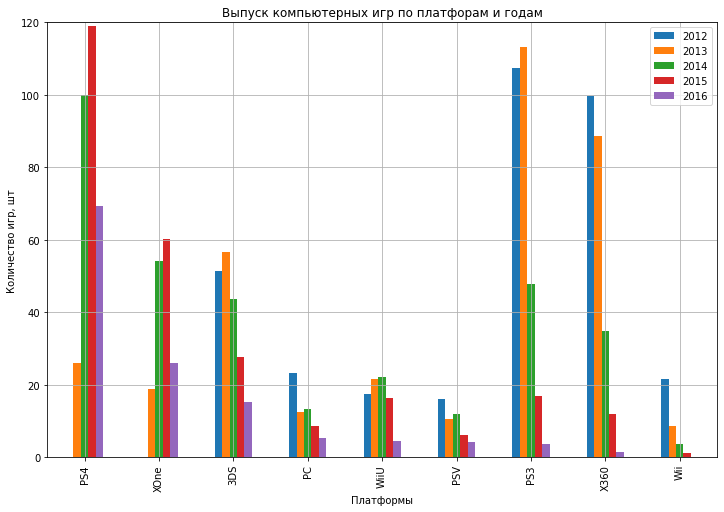

In [61]:
#display(pivot_platform_actual.head(20))
pivot_platform_actual.plot(x='platform',kind='bar',title='Выпуск компьютерных игр по платфорам и годам',
    ylim=(0,120),grid=True,figsize=(12,8))
plt.xlabel("Платформы")
plt.ylabel("Количество игр, шт")  
plt.show()

### Построение ящика с усами
Построим график "Ящик с усами" с суммарными продажами игр с дифференциацией по платформам.
Поскольку данная разновидность графика визуально отображает размер большинства значений, его необходимо строить по целому массиву значений, а не результатам построения сводной таблицы.
Возьмем за основу датафрейм с данными продаж за 2016 год.

In [62]:
df_2016.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
94,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
108,Pokemon Sun/Moon,3DS,2016.0,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,NaN,7.14
171,Uncharted 4: A Thief's End,PS4,2016.0,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
245,Call of Duty: Infinite Warfare,PS4,2016.0,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47
289,Battlefield 1,PS4,2016.0,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M,4.07


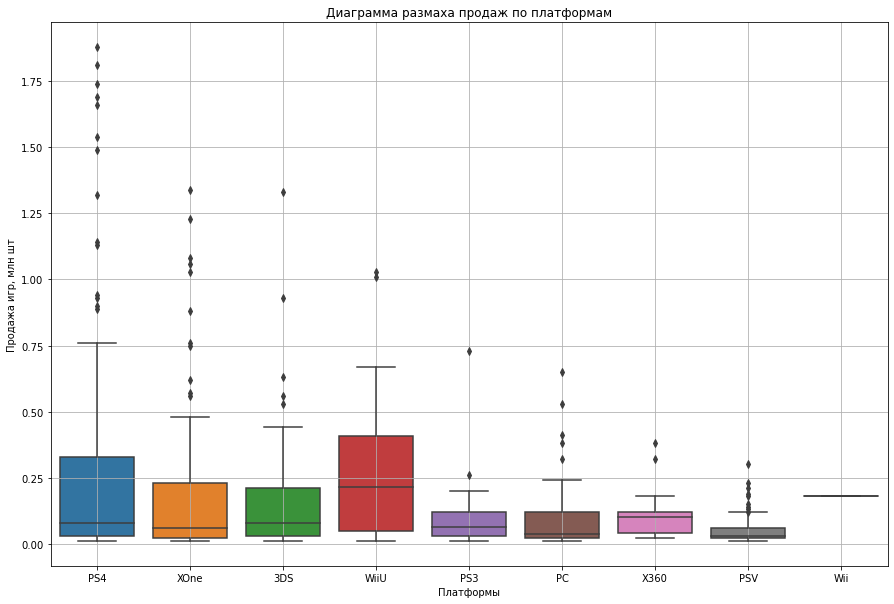

In [63]:
df_2016_2000 = df_2016[df_2016['all_sales'] <=2]    # для более выразительного графика отфильтруем выбросы свыше 2 млн
plt.figure(figsize=(15,10))
sns.boxplot(x='platform',y='all_sales',data = df_2016_2000)# строим график
plt.xlabel("Платформы")
plt.title('Диаграмма размаха продаж по платформам')
plt.ylabel("Продажа игр, млн шт")
plt.grid(True)
plt.show()

Промежуточный вывод: график "ящик с усами" с глобальными продажами с дифференциацией по платформам построен.

На графике по всем платформам(кроме WiiU) низ ящика, то есть значение первого квартиля близко к нулю, что отражает значительное количество игр с околонулевыми продажами по всем платформам, кроме WiiU, что может означать о наличии системы недопуска игр для данной платформы с низким рейтингом.
Аналогичная ситуация с медианой (горизонтальная линия в ящике).

Верх ящика, то есть третий квартиль у всех платформ разный и означает величину продаж в млн шт, выше которой 2/3 самых успешных игр.

Наличие выбросов у платформы PS4 в верхнем диапазоне означает наличие очень успешных игр на данной платформе.

### Построение диаграммы рассеяния

В соответствие заданию построим диаграмму рассеяния по одной из популярной платформы. Для более чистого графика необходимо взять максимально очищенный от пропусков датафрейм df с фильтрацией за последние несколько лет:

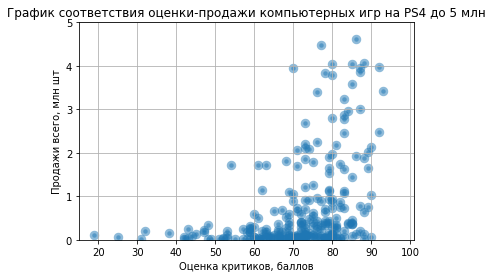

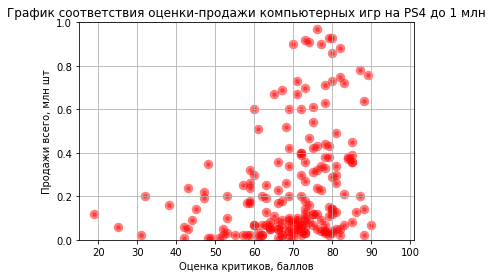

Корреляция: 0.4065679020617814


In [64]:
df_scattering = df[df['year_of_release'] >=2012]                       # фильтруем от 2012 года и далее
df_scattering = df[df['platform'] =='PS4']                             # фильтруем платформу
#display(df_scattering.head())

df_scattering.plot(x='critic_score',y='all_sales',kind='scatter',title='График соответствия оценки-продажи компьютерных игр на PS4 до 5 млн',
    ylim=(0,5),grid=True,alpha=0.5,linewidth=5)
plt.xlabel("Оценка критиков, баллов")
plt.ylabel("Продажи всего, млн шт")  
plt.show()

df_scattering.plot(x='critic_score',y='all_sales',kind='scatter',title='График соответствия оценки-продажи компьютерных игр на PS4 до 1 млн',
    ylim=(0,1),grid=True,alpha=0.5,color='r',linewidth=5)
plt.xlabel("Оценка критиков, баллов")
plt.ylabel("Продажи всего, млн шт")  
plt.show()
print('Корреляция:',df_scattering['critic_score'].corr(df_scattering['all_sales']))

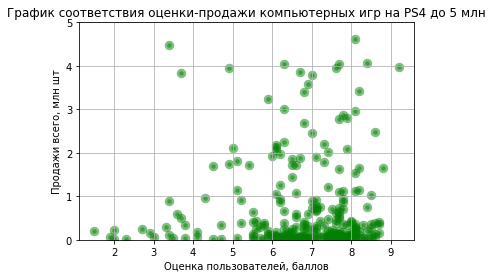

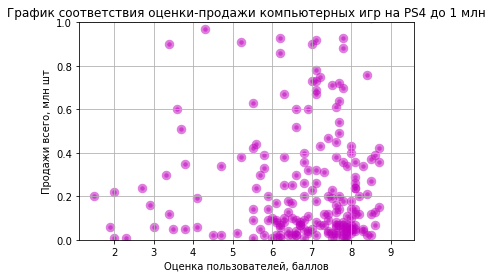

Корреляция: -0.031957109005188306


In [65]:
#display(df_scattering.head())
df_scattering.plot(x='user_score',y='all_sales',kind='scatter',title='График соответствия оценки-продажи компьютерных игр на PS4 до 5 млн',
    ylim=(0,5),grid=True,alpha=0.5,color='g',linewidth=5)
plt.xlabel("Оценка пользователей, баллов")
plt.ylabel("Продажи всего, млн шт")  
plt.show()

df_scattering.plot(x='user_score',y='all_sales',kind='scatter',title='График соответствия оценки-продажи компьютерных игр на PS4 до 1 млн',
    ylim=(0,1),grid=True,alpha=0.5,color='m',linewidth=5)
plt.xlabel("Оценка пользователей, баллов")
plt.ylabel("Продажи всего, млн шт")  
plt.show()
print('Корреляция:',df_scattering['user_score'].corr(df_scattering['all_sales']))

Можно констатировать, что успешные игры всегда сопровождаются высокими оценками критиков. Но при этом высокая оценка критиков не гарантирует высокие продажи продукта, так как большинство игр получает высокие оценки от критиков, но продажи игр не достигают половины миллиона. Коэффициент корреляции (0,4) подтверждает наличие средней связи между величинами.

По сравнению с оценками критиков, точки данных оценки пользователей смещены влево, то есть многие игры получившие большую популярность и продажи, от пользователей получили плохие оценки. Коэффициент корреляции стремится к нулю.

Соответственно, если планировать работу рекламной компании, лучше отталкиваться от более надежной оценки критиков.

Проверим данные выводы по другой платформе:

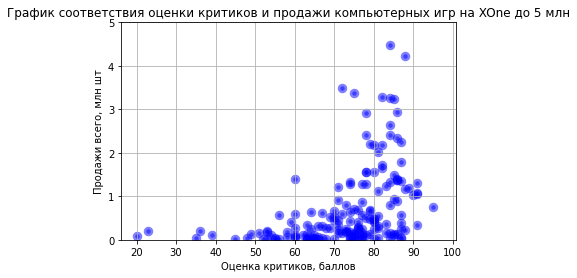

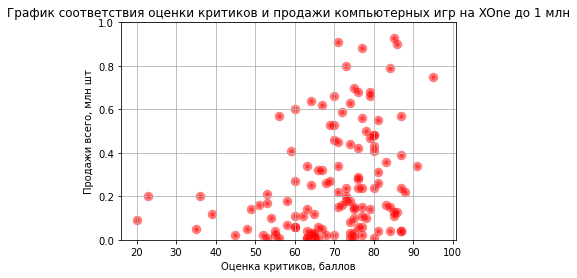

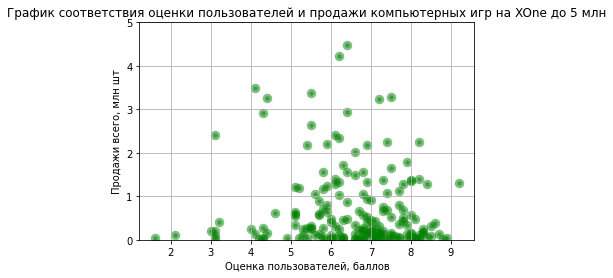

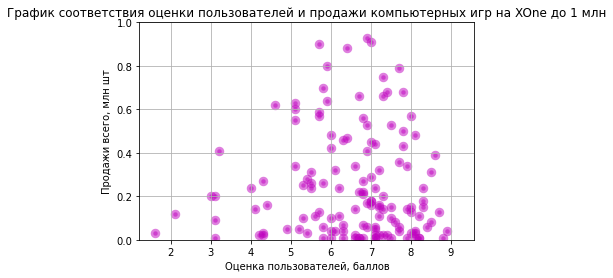

Корреляция между оценкой критиков и продажами: 0.4169983280084015
Корреляция между оценкой пользователями и продажами: -0.06892505319711217


In [66]:
df_scattering_XOne = df[df['year_of_release'] >=2012]                       # фильтруем от 2012 года и далее
df_scattering_XOne = df[df['platform'] =='XOne']                             # фильтруем платформу
#display(df_scattering.head())
                                                        # Создаем списки с данными для графика
title_list=['График соответствия оценки критиков и продажи компьютерных игр на XOne до 5 млн',
    'График соответствия оценки критиков и продажи компьютерных игр на XOne до 1 млн',
    'График соответствия оценки пользователей и продажи компьютерных игр на XOne до 5 млн',
    'График соответствия оценки пользователей и продажи компьютерных игр на XOne до 1 млн']
ylim_list=[5,1,5,1]
color_list = ['b','r','g','m']
xlabel_list = ['Оценка критиков, баллов','Оценка критиков, баллов',
    'Оценка пользователей, баллов','Оценка пользователей, баллов']
x_list=['critic_score','critic_score','user_score','user_score']

for i in [0,1,2,3]:                                      # Цикл с графиком
    #print('i=',i)
    df_scattering_XOne.plot(x=x_list[i],y='all_sales',kind='scatter',title=title_list[i],
        ylim=(0,ylim_list[i]),grid=True,alpha=0.5,linewidth=5,color=color_list[i])
    plt.xlabel(xlabel_list[i])
    plt.ylabel("Продажи всего, млн шт")  
    plt.show()

print('Корреляция между оценкой критиков и продажами:',df_scattering_XOne['critic_score'].corr(df_scattering_XOne['all_sales']))
print('Корреляция между оценкой пользователями и продажами:',df_scattering_XOne['user_score'].corr(df_scattering_XOne['all_sales']))

По результатам построения графиков по другой платформе, выводы остаются прежними.

### Прибыльные жанры
По аналогии с платформами, создадим сводную таблицу медианных значений продаж игр с дифференциацией по жанрам (а в связи с возможным искажением данных за последний год, еще и с дифференциацией по последним 5 годам):

,genre,2012,2013,2014,2015,2016,mean
0,Shooter,0.415,0.340,0.660,0.925,0.240,0.516
1,Platform,0.150,0.385,0.830,0.100,0.100,0.313
2,Sports,0.280,0.370,0.460,0.120,0.120,0.270
3,Racing,0.245,0.340,0.170,0.150,0.050,0.191
4,Misc,0.190,0.175,0.160,0.190,0.040,0.151
5,Action,0.170,0.200,0.205,0.070,0.050,0.139
6,Role-Playing,0.180,0.180,0.110,0.105,0.120,0.139
7,Fighting,0.190,0.155,0.130,0.100,0.085,0.132
8,Simulation,0.195,0.105,0.120,0.200,0.025,0.129
9,Strategy,0.090,0.190,0.060,0.045,0.060,0.089


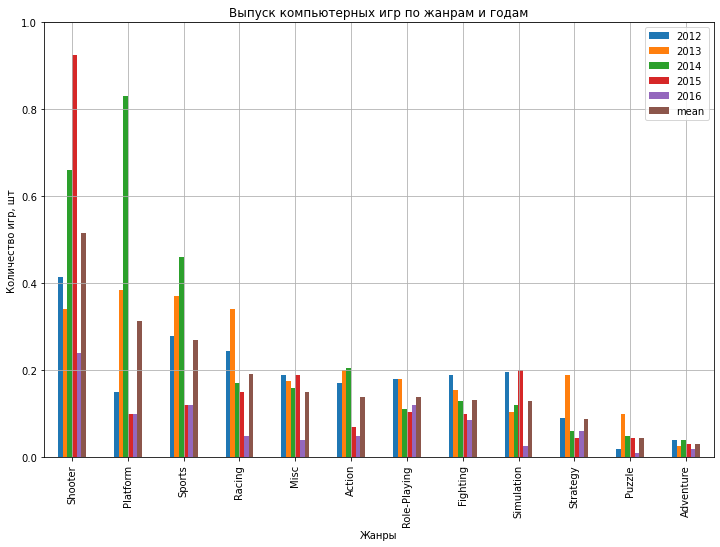

In [67]:
pivot_genre = df_2012_2016.pivot_table(index='genre', columns='year_of_release', # Создаём сводную таблицу 
    values='all_sales',aggfunc='median').reset_index()
pivot_genre.columns = ['genre','2012','2013','2014','2015','2016'] # Переименование столбцов
pivot_genre['mean'] = (pivot_genre['2012']+pivot_genre['2013']+pivot_genre['2014']+pivot_genre['2015']+pivot_genre['2016'])/5
pivot_genre = pivot_genre.sort_values(by='mean',ascending = False).reset_index(drop=True) # Сортировка по убыванию
display(pivot_genre.head(20))

pivot_genre.plot(x='genre',kind='bar',title='Выпуск компьютерных игр по жанрам и годам',
    ylim=(0,1),grid=True,figsize=(12,8))
plt.xlabel("Жанры")
plt.ylabel("Количество игр, шт")  
plt.show()

Промежуточный вывод: приведенные данные наглядно свидетельствуют о различной покупательской способности игр разных жанров. Наиболее покупаемыми являются (в порядке убывания): Shooter, Platform, Sports, Racing, Misc, а наименее покупаемыми являются такие жанры, как Adventure и Puzzle.

### Составление портрета пользователя каждого региона

#### Самые пополярные платформы

Составим сводные таблицы и отобразим на графиках динамику популярных платформ компьютерных игр:

      Характеристика продаж игр в Северной Америке


,platform,na_sales
0,X360,140.05
1,PS4,108.74
2,PS3,103.38
3,XOne,93.12
4,3DS,55.31


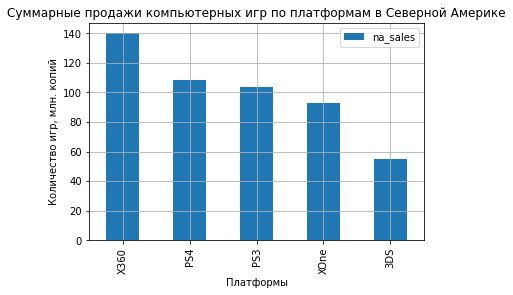

  
      Характеристика продаж игр в Европе


,platform,eu_sales
0,PS4,141.09
1,PS3,106.86
2,X360,74.52
3,XOne,51.59
4,3DS,42.64


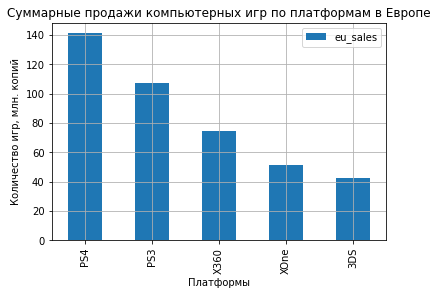

  
      Характеристика продаж игр в Японии


,platform,jp_sales
0,3DS,87.79
1,PS3,35.29
2,PSV,21.04
3,PS4,15.96
4,WiiU,13.01


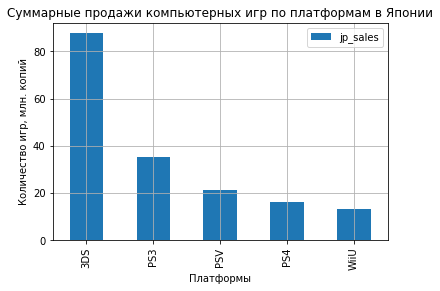

In [68]:
#display(df_2012_2016.head(10))
region_list = ['Северной Америке','Европе','Японии']
values_list = ['na_sales','eu_sales','jp_sales']
for i in [0,1,2]:
    print('      Характеристика продаж игр в', region_list[i])
    pivot_platform = df_2012_2016.pivot_table(index='platform', values=values_list[i],aggfunc='sum').reset_index()
    pivot_platform = pivot_platform.sort_values(by=values_list[i],ascending = False).reset_index(drop=True)# Сортировка по убыванию
    pivot_platform = pivot_platform[0:5]
    display(pivot_platform.head(10)) # Вывод на экран Топ-5
    title = 'Суммарные продажи компьютерных игр по платформам в '+region_list[i]
    pivot_platform.plot(x='platform',kind='bar',title=title,grid=True,figsize=(6,4))
    plt.xlabel("Платформы")
    plt.ylabel("Количество игр, млн. копий")  
    plt.show()
    print('  ')

Промежуточный вывод: 
* в Северной Америке в актуальном периоде доминировали платформы X360, PS4, PS3, XOne и 3DS.
* в Европе PS4, PS3, X360, XOne и 3DS.
* в Японии 3DS, PS3, PSV, PS4 и WiiU.

Различие преобладания продаж игр той или иной платформы определяется распространенностью той или иной платформы и доступностью (фактическое наличие и цена) игр этих платформ для покупателя.

#### Самые популярные жанры по регионам

Составим сводные таблицы и отобразим на грификах динамику жанров компьютерных игр:

      Характеристика продаж игр в Северной Америке


,genre,na_sales
0,Shooter,0.20
1,Platform,0.09
2,Sports,0.08
3,Fighting,0.05
4,Racing,0.04


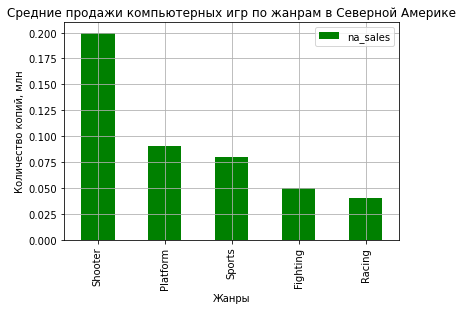

  
      Характеристика продаж игр в Европе


,genre,eu_sales
0,Shooter,0.17
1,Racing,0.09
2,Platform,0.08
3,Sports,0.05
4,Simulation,0.03


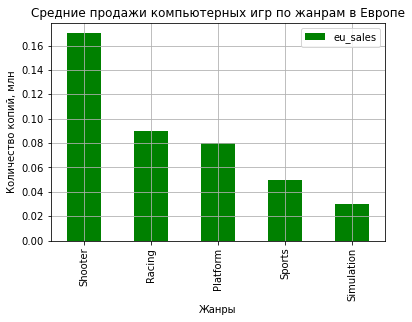

  
      Характеристика продаж игр в Японии


,genre,jp_sales
0,Role-Playing,0.06
1,Fighting,0.03
2,Misc,0.02
3,Action,0.01
4,Adventure,0.01


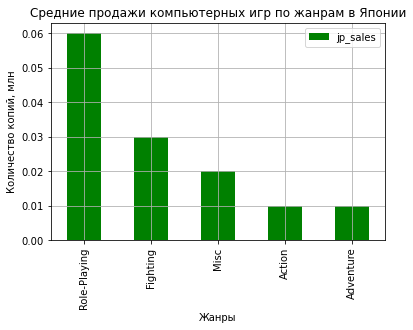

In [69]:
#display(df_2012_2016.head(10))
region_list = ['Северной Америке','Европе','Японии']
values_list = ['na_sales','eu_sales','jp_sales']
for i in [0,1,2]:
    print('      Характеристика продаж игр в', region_list[i])
    pivot_platform = df_2012_2016.pivot_table(index='genre', values=values_list[i],aggfunc='median').reset_index()
    pivot_platform = pivot_platform.sort_values(by=values_list[i],ascending = False).reset_index(drop=True)# Сортировка по убыванию
    pivot_platform = pivot_platform[0:5]
    display(pivot_platform.head(10)) # Вывод на экран Топ-5
    title='Средние продажи компьютерных игр по жанрам в '+region_list[i]
    pivot_platform.plot(x='genre',kind='bar',title=title,grid=True,color='g',figsize=(6,4))
    plt.xlabel("Жанры")
    plt.ylabel("Количество копий, млн")  
    plt.show()
    print('  ')

Промежуточные выводы:
* В Северной Америке доминируют жанры: Shooter, Platform, Sports, Fighting и Racing;
* В Европе: Shooter, Racing, Platform, Sports и Simulation;
* В Японии: Role-Playing, Fighting, Misc, Action и Adventure.

Различие в жанрах в разных регионах определяется различными предпочтениями покупателей (их потребности в отдыхе).

#### Рейтинг ESRB

Составим сводные таблицы и отобразим на графиках динамику ретинга компьютерных игр:

Северная Америка:


,rating,2012,2013,2014,2015,2016
0,M,66.36,68.79,49.39,31.36,15.67
1,T,16.23,10.84,16.09,13.91,8.95
2,E,35.32,28.31,24.15,18.62,7.97
3,E10+,21.46,21.01,15.36,14.06,3.81


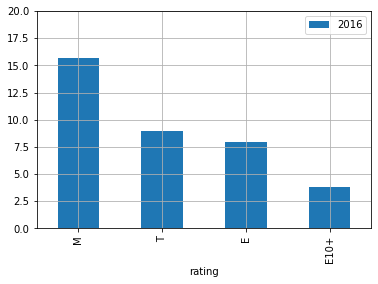

Европа:


,rating,2012,2013,2014,2015,2016
0,M,48.64,51.88,47.90,29.00,16.54
1,E,29.67,25.30,23.23,21.22,13.61
2,T,11.01,7.88,13.75,10.53,9.79
3,E10+,12.68,16.53,14.62,7.73,3.81


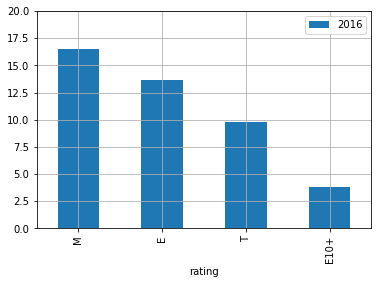

Япония:


,rating,2012,2013,2014,2015,2016
0,T,5.43,5.81,7.08,5.43,2.27
1,M,7.09,6.10,3.72,3.09,1.20
2,E,13.19,6.20,3.69,4.18,1.07
3,E10+,2.30,1.43,1.19,2.82,0.45


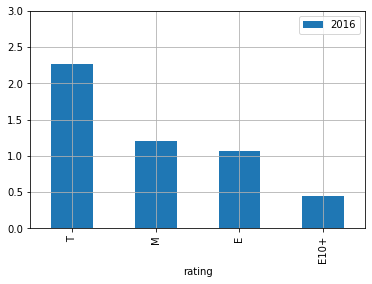

In [70]:
#display(df_2012_2016.head(10))
df_2012_2016_esrb = df_2012_2016.copy()
df_2012_2016_esrb=df_2012_2016_esrb.dropna(subset=['rating'])

print('Северная Америка:')
pivot_2012_2016_esrb_na = df_2012_2016_esrb.pivot_table(index='rating', columns='year_of_release', # Создаём сводную таблицу 
    values='na_sales',aggfunc='sum').reset_index()
pivot_2012_2016_esrb_na.columns = ['rating','2012','2013','2014','2015','2016'] # Переименование столбцов
pivot_2012_2016_esrb_na = pivot_2012_2016_esrb_na.sort_values(by='2016',ascending = False).reset_index(drop=True)# Сортировка по убыванию
display(pivot_2012_2016_esrb_na.head(5)) # Вывод на экран Топ-5

pivot_2012_2016_esrb_na.plot(x='rating',y='2016',ylim=(0,20),kind='bar',legend=True,
    xlim=(0,5),grid=True,figsize=(6,4)) # Строим гистограмму
plt.show()                         # подготовка к новому графику

print('Европа:')
pivot_2012_2016_esrb_eu = df_2012_2016_esrb.pivot_table(index='rating', columns='year_of_release', # Создаём сводную таблицу 
    values='eu_sales',aggfunc='sum').reset_index()
pivot_2012_2016_esrb_eu.columns = ['rating','2012','2013','2014','2015','2016'] # Переименование столбцов
pivot_2012_2016_esrb_eu = pivot_2012_2016_esrb_eu.sort_values(by='2016',ascending = False).reset_index(drop=True)# Сортировка по убыванию
display(pivot_2012_2016_esrb_eu.head(5)) # Вывод на экран Топ-5

pivot_2012_2016_esrb_eu.plot(x='rating',y='2016',ylim=(0,20),kind='bar',legend=True,
    xlim=(0,5),grid=True,figsize=(6,4)) # Строим гистограмму
plt.show()                         # подготовка к новому графику

print('Япония:')
pivot_2012_2016_esrb_jp = df_2012_2016_esrb.pivot_table(index='rating', columns='year_of_release', # Создаём сводную таблицу 
    values='jp_sales',aggfunc='sum').reset_index()
pivot_2012_2016_esrb_jp.columns = ['rating','2012','2013','2014','2015','2016'] # Переименование столбцов
pivot_2012_2016_esrb_jp = pivot_2012_2016_esrb_jp.sort_values(by='2016',ascending = False).reset_index(drop=True)# Сортировка по убыванию
display(pivot_2012_2016_esrb_jp.head(5)) # Вывод на экран Топ-5

pivot_2012_2016_esrb_jp.plot(x='rating',y='2016',ylim=(0,3),kind='bar',legend=True,
    xlim=(0,5),grid=True,figsize=(6,4)) # Строим гистограмму
plt.show()                         # подготовка к новому графику


Промежуточный вывод: данные свидетельствует о различных предпочтениях разных регионов игр с разным рейтингом ESRB: в Северной Америке возглавляет ретинг M и T, то есть игры для взрослых и для подростков, в Европе M и E, то есть игры для взрослых и для детей, в Японии для подростков и взрослых. 

### Проверка гипотез о равенстве средних пользовательских рейтингов.

#### Проверка гипотезы о равенстве оценки пользователей игр между разными платформами
Сформулируем нулевую гипотезу H₀: **"Средняя оценка пользователей компьютерных игр для платформы Xbox One равна средней оценке пользовательей компьютерных игр для ПК."**

Сформулируем альтернативную гипотезу H₁ (утверждение, которое принимается верным, если отбрасывается H₀): **"Средняя оценка пользователей компьютерных игр для платформы Xbox One не равна средней оценке пользовательей компьютерных игр для ПК."**

Воспользуемся методом scipy.stats.ttest_ind() c атрибутом qual=False в связи с разной дисперсией и разного размера выборок (хотя выборки большие, заморачиваться было не обязательно), и создадим соответствующую функцию, которая упростит проверку гипотез.

Критический уровень статистической значимости примем равный 0,05 (рекомендуемый документацией для данного метода).

   Длина первого датафрейма 176
   Длина второго датафрейма 182

   Дисперсия данных в первом датафрейме  1.894
   Дисперсия данных во втором датафрейме 2.897

   p - значение: 0.3383496734528312 ( 0.3383 )
   Нет причин отвергать нулевую гипотезу о равенстве оценки пользователей игр между разными платформами


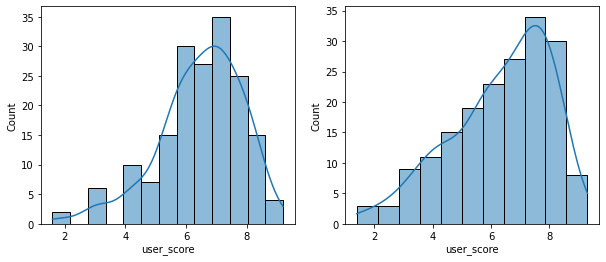

In [71]:
def hypothesis(text,alpha, df_1,df_2):     
    print('   Длина первого датафрейма', len(df_1))
    print('   Длина второго датафрейма', len(df_2))
    print()
    print('   Дисперсия данных в первом датафрейме ', round(np.var(df_1),3))
    print('   Дисперсия данных во втором датафрейме', round(np.var(df_2),3))
    print() 
    result = st.ttest_ind(df_1, df_2,equal_var = False)                  # активируем метод 
    print('   p - значение:',result.pvalue,'(',round(result.pvalue,4),')')                               # выводим на экран 
    if result.pvalue < alpha:
        print('   Отвергаем нулевую гипотезу',text)
    else:
        print('   Нет причин отвергать нулевую гипотезу',text)
    
    fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=(10, 4))
    #вытягиваем
    ax = ax.flatten()
    sns.histplot(data = df_1, ax=ax[0], kde = True,palette='muted')
    sns.histplot(data = df_2, ax=ax[1], kde = True,palette='muted')
    plt.show() 
    
df_2012_2016_hypothesis=df_2012_2016_esrb.dropna(subset=['user_score'])

hypothesis('о равенстве оценки пользователей игр между разными платформами',0.05,
    df_2012_2016_hypothesis[df_2012_2016_hypothesis['platform']=='XOne']['user_score'],
    df_2012_2016_hypothesis[df_2012_2016_hypothesis['platform']=='PC']['user_score'])

Промежуточный вывод: нет оснований отвергнуть нулевую гипотезу "Средняя оценка пользователей компьютерных игр для платформы Xbox One равна средней оценке пользовательей компьютерных игр для ПК."

#### Проверка гипотезы о равенстве оценки пользователей игр между разными жанрами
Сформулируем нулевую гипотезу H₀: **"Средняя оценка пользователей компьютерных игр жанра Action равна средней оценке пользовательей компьютерных игр жанра Sports."**

Сформулируем альтернативную гипотезу H₁ (утверждение, которое принимается верным, если отбрасывается H₀): **"Средняя оценка пользователей компьютерных игр жанра Action не равна средней оценке пользовательей компьютерных игр жанра Sports"**

   Длина первого датафрейма 509
   Длина второго датафрейма 190

   Дисперсия данных в первом датафрейме  1.899
   Дисперсия данных во втором датафрейме 3.042

   p - значение: 2.967778026507268e-19 ( 0.0 )
   Отвергаем нулевую гипотезу о равенстве оценки пользователей игр между разными жанрами


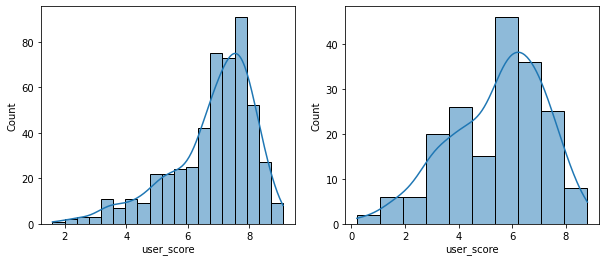

In [72]:
hypothesis('о равенстве оценки пользователей игр между разными жанрами',0.05,
    df_2012_2016_hypothesis[df_2012_2016_hypothesis['genre']=='Action']['user_score'],
    df_2012_2016_hypothesis[df_2012_2016_hypothesis['genre']=='Sports']['user_score'])

Промежуточный вывод: нет оснований отвергать альтернативную гипотезу "Средняя оценка пользователей компьютерных игр жанра Action не равна средней оценке пользовательей компьютерных игр жанра Sports".

## Выводы

В результате исследования установлено:

**1.Количество игр, выпускаемых за год:**
- Максимальное количество игр - 1427 штук было выпущено в 2008 году, к 2016 году их количество снизилось до 502.
- Кроме ожидаемого роста количества игр в 90-е годы, наблюдается падение выпуска игр после мирового финансового кризиса 2008 года (или предоставлены неполные данные).

**2. Жизненный цикл платформ:**
- Для всех платформ, кроме персональных компьютеров, характерен срок жизни от 7 до 11-12 лет.

**3. Выделен последний, 2016 год:**
- В 2016 году с большим отрывом лидирует платформа PS4 с продажами размером 69 млн.;
- Также можно выделить четыре лидера: XOne, 3DS, PC, WiiU и PSV.

**4. Определена динамика платформ:**
- Продажи падают по всем платформам, и происходит это очень стремительно;
- Медленнее всего упали продажи по PSV, быстрее всего по X360;
- Потенциально прибыльными платформами можно назвать PSV, PC и PS4.

**5. Построен график "ящик с усами" глабальных продаж с дифференциацией по платформам**
-  На графике по всем платформам(кроме WiiU) низ ящика, то есть значение первого квартиля близко к нулю, что отражает значительное количество игр с околонулевыми продажами по всем платформам, кроме WiiU, что может означать о наличии системы недопуска игр для данной платформы с низким рейтингом. Аналогичная ситуация с медианой (горизонтальная линия в ящике).
- Верх ящика, то есть третий квартиль у всех платформ разный и означает величину продаж в млн шт, выше которой 2/3 самых успешных игр.
- Наличие выбросов у платформы PS4 в верхнем диапазоне означает наличие очень успешных игр на данной платформе.

**6. Построены диаграммы рассеяния отзывов и глобальных продаж**
- Можно констатировать, что успешные игры всегда сопровождаются высокими оценками критиков;
- Но при этом высокая оценка критиков не гарантирует высокие продажи продукта, так как большинство игр получает высокие оценки от критиков, но продажи игр не достигают половины миллиона. Коэффициент корреляции (0,4) подтверждает наличие средней связи между величинами.
- По сравнению с оценками критиков, точки данных оценки пользователей смещены влево, то есть многие игры получившие большую популярность и продажи, от пользователей получили плохие оценки. Коэффициент корреляции стремится к нулю.
- Соответственно, если планировать работу рекламной компании, лучше отталкиваться от более надежной оценки критиков.

**7. Определены наиболее прибыльные жанры**
- Данные свидетельствуют о различной покупательской способности игр разных жанров. 
- Наиболее покупаемыми являются (в порядке убывания): Shooter, Platform, Sports, Racing, Misc, а наименее покупаемыми являются такие жанры, как Adventure и Puzzle.

**8. Определены региональные предпочтения**
- В Северной Америке в 2016 доминировали платформы в Северной Америке в актуальном периоде доминировали платформы X360, PS4, PS3, XOne и 3DS, в Европе PS4, PS3, X360, XOne и 3DS, в Японии 3DS, PS3, PSV, PS4 и WiiU;
- Различие преобладания продаж игр той или иной платформы определяется распространенностью той или иной платформы и доступностью (фактическое наличие и цена) игр этих платформ для покупателя.
- В Северной Америке доминируют жанры: Shooter, Platform, Sports, Fighting и Racing, в Европе: Shooter, Racing, Platform, Sports и Simulation, в Японии: Role-Playing, Fighting, Misc, Action и Adventure.
- Различие в жанрах в разных регионах определяется различными предпочтениями покупателей (их потребности в отдыхе).
- В разных регионах преобладают игры с разным рейтингом ESRB: в Североной Америке возглавляет ретинг M и T, то есть игры для взрослых и для подростков, в Европе M и E, то есть игры для взрослых и для детей, в Японии для подростков и взрослых. 

**9. Проверены гипотезы о различии средних пользовательских рейтингов**
- Нет оснований отвергать нулевую гипотезу "Средняя оценка пользователей компьютерных игр для платформы Xbox One равна средней оценке пользовательей компьютерных игр для ПК."
- Нет оснований отвергать альтернативную гипотезу "Средняя оценка пользователей компьютерных игр жанра Action не равна средней оценке пользовательей компьютерных игр жанра Sports".

**6. Итоговое резюме. При планировании рекламной компании необходимо учитывать:**
- Различные региональные предпочтения по жанрам компьютерных игр и используемым платформам;
- Жизненный цикл новых платформ, как правило, завершается через 10 лет. В ближайшие годы большую распрастраненность может получить платформа XOne;
- Продажи падают по всем платформам, и происходит это очень стремительно (или предоставлены неполные данные);
- Отдавать предпочтение оценки компьютерным играм, оставляемые критиками, а не пользователями.